In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
import seaborn as sns


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [3]:
df = pd.read_csv("Sales_Data.csv")

In [4]:
df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34519,2023-10-09,HIGHLAND YOGHURT,80ML,12,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34520,2023-10-09,HIGHLAND YOGHURT,80ML,9,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34521,2023-10-09,HIGHLAND YOGHURT,80ML,13,9,10,2023,Monday,YOGHURT,Weekday,NaN,41
34522,2023-10-09,HIGHLAND YOGHURT,80ML,7,9,10,2023,Monday,YOGHURT,Weekday,NaN,41


In [5]:
df.isnull().sum()

Date                   0
Product Name           0
Product Quantity       0
Units sold             0
Day                    0
Month                  0
Year                   0
DayOfWeek              0
Category               0
DayType                0
Rainfall            2103
Week_of_Year           0
dtype: int64

In [6]:
df.dropna(inplace = True)

Model

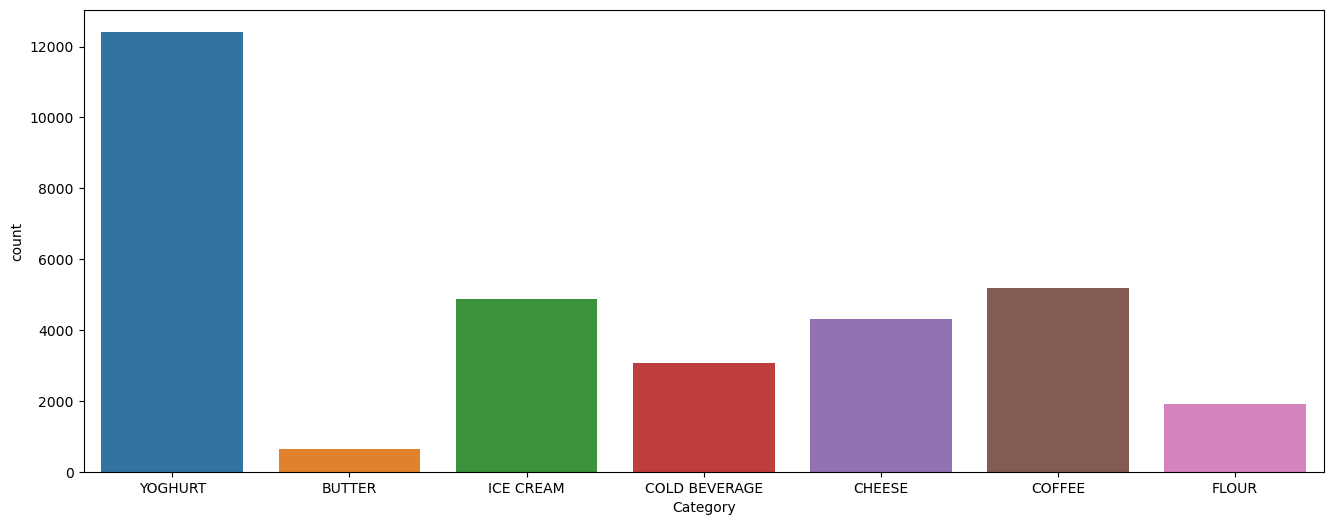

In [7]:
plt.figure(figsize=(16,6))
sns.countplot(x='Category', data = df)
plt.show()

C:\Users\arkha\AppData\Local\Temp\ipykernel_20708\2174479189.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rainfall'])


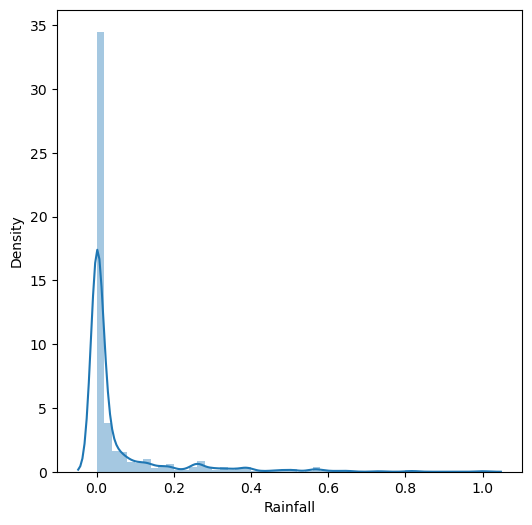

In [8]:
plt.figure(figsize=(6,6))
sns.distplot(df['Rainfall'])
plt.show()

In [9]:
df

,Date,Product Name,Product Quantity,Units sold,Day,Month,Year,DayOfWeek,Category,DayType,Rainfall,Week_of_Year
0,2022-01-02,AMBEWELA SET YOGHURT,80ML,6,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
1,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
2,2022-01-01,AMBEWELA SET YOGHURT,80ML,1,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
3,2022-01-01,AMBEWELA SET YOGHURT,80ML,6,1,1,2022,Saturday,YOGHURT,Weekend,0.000801,52
4,2022-01-02,AMBEWELA SET YOGHURT,80ML,10,2,1,2022,Sunday,YOGHURT,Weekend,0.060849,52
...,...,...,...,...,...,...,...,...,...,...,...,...
34202,2023-09-30,HIGHLAND YOGHURT,80ML,34,30,9,2023,Saturday,YOGHURT,Weekend,0.236990,39
34203,2023-09-30,HIGHLAND YOGHURT,80ML,6,30,9,2023,Saturday,YOGHURT,Weekend,0.236990,39
34233,2023-09-24,HIGHLAND YOGHURT,80ML,69,24,9,2023,Sunday,YOGHURT,Weekend,0.024019,38
34234,2023-09-25,HIGHLAND YOGHURT,80ML,10,25,9,2023,Monday,YOGHURT,Weekday,0.036829,39


In [10]:
df.describe()

,Units sold,Day,Month,Year,Rainfall,Week_of_Year
count,32421.000000,32421.000000,32421.000000,32421.000000,32421.000000,32421.000000
mean,11.505907,16.052127,5.944511,2022.433916,0.054823,24.078653
std,38.923630,8.886761,3.218504,0.495621,0.126682,14.078479
min,0.000000,1.000000,1.000000,2022.000000,0.000000,1.000000
25%,1.000000,8.000000,3.000000,2022.000000,0.000000,12.000000
50%,3.000000,16.000000,6.000000,2022.000000,0.000000,24.000000
75%,9.000000,24.000000,8.000000,2023.000000,0.032826,35.000000
max,2875.000000,31.000000,12.000000,2023.000000,1.000000,52.000000


In [17]:
# X = pd.get_dummies(X, columns=['Date'])
# X_numerical = sc_x.fit_transform(X.select_dtypes(include=['float64', 'int64']))
# X = pd.concat([X_numerical, X.drop(columns=X_numerical.columns)], axis=1)

dummy = pd.get_dummies(df, columns=['Date', 'Product Quantity'], drop_first=True)
df = dummy
df.head()

KeyError: "['Date'] not in index"

In [13]:
#data is split into X train and Y train
X = df.drop(columns=['Product Name']).values
X

array([['80ML', 6, 2, ..., False, False, False],
       ['80ML', 6, 1, ..., False, False, False],
       ['80ML', 1, 1, ..., False, False, False],
       ...,
       ['80ML', 69, 24, ..., False, False, False],
       ['80ML', 10, 25, ..., False, False, False],
       ['80ML', 6, 27, ..., False, False, False]], dtype=object)

In [14]:
Y = df['Product Name'].values
Y

array(['AMBEWELA SET YOGHURT', 'AMBEWELA SET YOGHURT',
       'AMBEWELA SET YOGHURT', ..., 'HIGHLAND YOGHURT',
       'HIGHLAND YOGHURT', 'HIGHLAND YOGHURT'], dtype=object)

In [15]:
from sklearn.preprocessing import StandardScaler

#StandardScaler objects are created
sc_x = StandardScaler()
sc_y = StandardScaler()

#the features are standardized
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y.reshape(-1,1))

ValueError: could not convert string to float: '80ML'

In [28]:
#data is split into training and testing data sets
#25% for testing and 75% for training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [1]:
model = Sequential()

NameError: name 'Sequential' is not defined

In [2]:
#input layer of the ANN
model.add(Dense(128, kernel_initializer='normal', input_shape = (X_train.shape[1],), activation='relu'))

NameError: name 'model' is not defined

In [3]:
#the hidden and dropout layers of the ANN
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))

NameError: name 'model' is not defined

In [ ]:
#output layer of ANN
model.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [ ]:
#compiling the model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model.summary()

In [5]:
#training the ANN model
model.fit(X_train,y_train,epochs=1000,batch_size=64,validation_split=0.2)

NameError: name 'model' is not defined

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
r2_value = r2_score(Y_test, pred)
accuracy = accuracy_score(Y_test, pred)

In [ ]:
r2_value
accuracy